This notebook is for the tasks of the applied statistics module. Completed by Patrick Foley.

Task 1: Permutations and Combinations

In [2]:
#IMPORTS
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from scipy.stats import shapiro, norm


Declaring the variables required for the cobinations formula.

C(n,k)= n!/k!(n−k)
​	

Where n is the total number of cups, and k is the no of cups with milk/ tea added first

In [98]:
#total cups
no_cups = 12

#cups with milk added first
no_cups_milk_first = 6

#cups with tea added first
no_cups_tea_first = 6

Using the math.comb to execute the combinations formula. We can find the total number of ways 6 cups with milk added first can be chosen from 12 total cups.

In [99]:
#math.comb for combinations formula
correct_cups = math.comb(no_cups, no_cups_milk_first)

print(correct_cups)

924


There is only one correct combination of cups that can be selceted.
So the probability of selecting this when assumed they have no super powers will be 1/correct_cups.

In [100]:
probability = 1/correct_cups

print(probability)

0.0010822510822510823


Now we must calculate the probality of getting 5 or more correct, ie. allowing for 1 mistake.
We will do this the long way and create list of every possible way that six random cups can be selected.

First we create a list of cup labels;

In [101]:
#decalre variable for 5 correct cups
labels = list(range(no_cups))

print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Then using the itertools.combindations method we can iterate over the labels and create a list of every possible different way 6 cups can be selected from 12 labelled cups.

In [102]:
combs = list(itertools.combinations(labels,no_cups_milk_first))


We find the length of this list, ie. how many different ways exist

In [103]:
len(combs)

924

This will randomly select 6 cups from the labels list. As if we were selecting without superpowers.
Using the random library in python.
The set() function will create a collection of unique elements in this case all unique combinations of selecting 6 out of 12 numbers unordered.

In [104]:
labels_milk_first = random.sample(labels, no_cups_milk_first)

labels_milk_first.sort

#create a set 
set(labels_milk_first)


{0, 1, 2, 7, 8, 10}

Here we create a for loop where for every combinitation in the combs list we will make it into a set then find any overlap of our random selection labels_milk_first. We then print how many numbers overlapped between the random unique selections and the total combinations len(overlap). 


In [105]:
#create an empty list
no_overlaps = []

for comb in combs:
  
  s1 = set(comb)
  
  s2 = set(labels_milk_first)

  overlap = s1.intersection(s2)

  print(comb, overlap, len(overlap))
#Append each length of the overlapped numbers to out empty list
#The length of each every overlap that can occur between each set from above.
#In other words each number represents the amount of cups the lady will guess right when randomly selecting 6 from 12
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 2} 3
(0, 1, 2, 3, 4, 6) {0, 1, 2} 3
(0, 1, 2, 3, 4, 7) {0, 1, 2, 7} 4
(0, 1, 2, 3, 4, 8) {0, 1, 2, 8} 4
(0, 1, 2, 3, 4, 9) {0, 1, 2} 3
(0, 1, 2, 3, 4, 10) {0, 1, 2, 10} 4
(0, 1, 2, 3, 4, 11) {0, 1, 2} 3
(0, 1, 2, 3, 5, 6) {0, 1, 2} 3
(0, 1, 2, 3, 5, 7) {0, 1, 2, 7} 4
(0, 1, 2, 3, 5, 8) {0, 1, 2, 8} 4
(0, 1, 2, 3, 5, 9) {0, 1, 2} 3
(0, 1, 2, 3, 5, 10) {0, 1, 2, 10} 4
(0, 1, 2, 3, 5, 11) {0, 1, 2} 3
(0, 1, 2, 3, 6, 7) {0, 1, 2, 7} 4
(0, 1, 2, 3, 6, 8) {0, 1, 2, 8} 4
(0, 1, 2, 3, 6, 9) {0, 1, 2} 3
(0, 1, 2, 3, 6, 10) {0, 1, 2, 10} 4
(0, 1, 2, 3, 6, 11) {0, 1, 2} 3
(0, 1, 2, 3, 7, 8) {0, 1, 2, 7, 8} 5
(0, 1, 2, 3, 7, 9) {0, 1, 2, 7} 4
(0, 1, 2, 3, 7, 10) {0, 1, 2, 7, 10} 5
(0, 1, 2, 3, 7, 11) {0, 1, 2, 7} 4
(0, 1, 2, 3, 8, 9) {0, 1, 2, 8} 4
(0, 1, 2, 3, 8, 10) {0, 1, 2, 8, 10} 5
(0, 1, 2, 3, 8, 11) {0, 1, 2, 8} 4
(0, 1, 2, 3, 9, 10) {0, 1, 2, 10} 4
(0, 1, 2, 3, 9, 11) {0, 1, 2} 3
(0, 1, 2, 3, 10, 11) {0, 1, 2, 10} 4
(0, 1, 2, 4, 5, 6) {0, 1, 2} 3
(0, 1, 2, 4, 5, 7

We then create a numpy array with number of times a length of an overlap occured.

In [106]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

Using matplotlib we can plot the number of times each amount is guessed. It is a normal distribution.

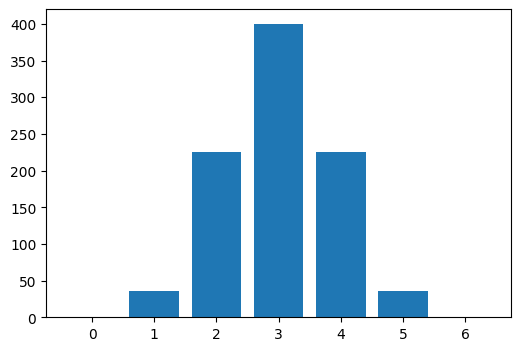

In [107]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

In [108]:
# Given counts tuple
counts = (np.array([0, 1, 2, 3, 4, 5, 6]), np.array([1, 36, 225, 400, 225, 36, 1]))

# Convert the arrays to lists
unique_values_list = counts[0].tolist()
occurrences_list = counts[1].tolist()

# Find the index of 5 in the unique values list
index_of_five = unique_values_list.index(5)

# Get the number of occurrences of 5
count_five = occurrences_list[index_of_five]

# Print the result
print(count_five)  # This will give the number of times 

36


We can see from the counts arrays that 5 overlaps occurs 36 times total. This is also illustrated in the graph above.

Now we must find the probabilty of selecting 5 cups correclty and/or 6 cups correctly.

In [109]:
correct_combo = 1
prob5or6 = (count_five + correct_combo) / correct_cups

In [110]:
prob5or6

0.04004329004329004

This can also be done a much quicker way like s using math.comb method:

In [ ]:
#Calculate the combinations for guessing exactly 5 cups correctly
comb_5_correct = math.comb(6, 5) * math.comb(6, 1)

#Total combinations already calculated (C(12, 6))
#Probability of guessing 5 or 6 correct cups
prob_5_or_more_correct = (comb_5_correct + correct_combo) / correct_cups

# isplay the results
print(f"Combinations for exactly 5 correct: {comb_5_correct}")
print(f"Probability of guessing at least 5 correctly: {prob_5_or_more_correct:.6f}")


Combinations for exactly 5 correct: 36
Probability of guessing at least 5 correctly: 0.040043


Would you accept 2 errors?
Lets calculate the probability of selecting 4/5/6 correct cups.

In [112]:
comb_4_correct = math.comb(6,4) * math.comb(6,2)

prob_4_or_more_correct = (comb_5_correct + comb_4_correct + correct_combo) / correct_cups

prob_4_or_more_correct

0.28354978354978355

This is giving them a 28% of being correct. I personally would not accept this because the probability increases quite a lot from at least 5 correct. It is quite possible that they could get lucky with this probability.

Task 2

In [ ]:
#Generate a sample of 100,000 values from a normal distribution
mean = 10.0
std_dev = 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=100000)


In [ ]:
#Shapiro-Wilk test
stat, p_value = shapiro(sample[:5000])  # Use a subset of the data (e.g., 5000 points) for Shapiro test
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

#Interpret the results
if p_value > 0.05:
    print("The sample appears to come from a normal distribution (fail to reject null hypothesis).")
else:
    print("The sample does not appear to come from a normal distribution (reject null hypothesis).")



Shapiro-Wilk Test Statistic: 0.9994, p-value: 0.1297
The sample appears to come from a normal distribution (fail to reject null hypothesis).


The p-value is greater than the common significance level (0.05).
As a result we fail to reject the null hypothesis.
This means the sampple generated using numpy with mean 10 and standard deviation 3 appears to come from a normal distribution.
The Shapiro-Wilk test supports this conclusion.

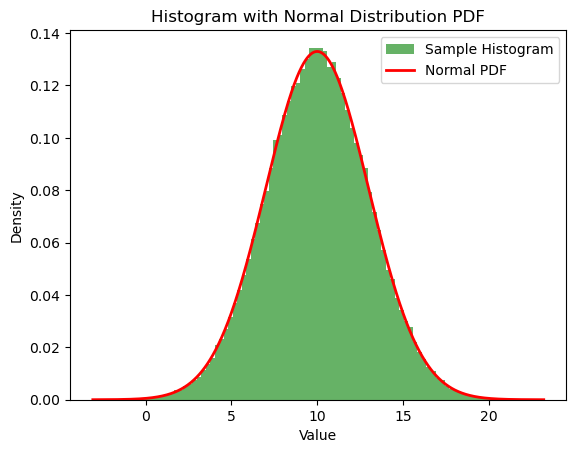

In [ ]:
#Plot histogram
plt.hist(sample, bins=100, density=True, alpha=0.6, color='g', label='Sample Histogram')

#Plot the normal distribution
x = np.linspace(min(sample), max(sample), 1000)
pdf = norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf, 'r', linewidth=2, label='Normal PDF')

plt.title('Histogram with Normal Distribution PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


Task 3

In [8]:
from scipy.stats import ttest_rel

In [ ]:
#Data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])


In [ ]:
#Calculate differences
differences = before - after

#Compute statistics manually
n = len(differences)
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1) 
t_stat_manual = mean_diff / (std_diff / np.sqrt(n))

print(f"Manual t-statistic: {t_stat_manual:.4f}")


Manual t-statistic: 1.3372


In [ ]:
#Use scipy.stats to compute the paired t-test
t_stat_scipy, p_value = ttest_rel(before, after)

print(f"scipy t-statistic: {t_stat_scipy:.4f}, p-value: {p_value:.4f}")

scipy t-statistic: 1.3372, p-value: 0.2140


The manual calculation anf the t_stat_scipy function produces the same result.
This confirms the manual computation correctly followed the standard formula for paired t-test.
The advantage of the scipy formula is it provides a p-value and also is automated.


Sources:
Scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/

T-test formula: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/

Task 4

In [24]:
from scipy.stats import f_oneway

In [ ]:
no_type_ii = 0

#Run 10,000 times
for _ in range(10000):
    # Generate samples
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    #Perform one-way anova
    _, p_value = f_oneway(sample1, sample2, sample3)
    
    #Count type II errors
    if p_value > 0.05:
        no_type_ii += 1


In [ ]:
#Calculate probability of Type II error
type_ii_prob = no_type_ii / 10000
print(f"Type II error probability: {type_ii_prob:.10f}")


Type II error probability: 0.0000000000


The error probability of 0 suggests the tst was able to detect differences between the group means in every simulation run.
The low standartd deviation (low variance) means it is easier for statistical tests to detect differences.
The sunstantial sample size increases the tests power.

This shows under the controlled conditions of this simulation the ANOVA one way test is highly sensitive to small changes in the group means.